In [52]:
cd "/home/enesk/repos/spatial-prediction"

/home/enesk/repos/spatial-prediction


In [53]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
from data_set import Dataset
from predictor import Predictor, models
from predictor_utils import PiecewiseSchedule, OptimizerSpec
from utils import get_session, plot_grid, plot_confusion_matrix
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from matplotlib import rc
from kriging_predictor import KrigingPredictor 
import tensorflow as tf
import matplotlib
import pickle
from active_sensing_environment import ExplorationEnvironment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [54]:
os.environ['CUDA_VISIBLE_DEVICES'] = '' # We don't need a GPU to test the model

In [55]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices):
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [56]:
random.seed(1000)
np.random.seed(1000)

In [57]:
# This is where the RL policy is stored
rl_policy_path = '/home/enesk/repos/spatial-prediction/models/RL/2023-09-13--19:46:46'

# This is where the DL predictor is
session_name = 'interpol_3_uav_3'

# This is where we will store results
output_name = session_name + "_separate"

# This will control which dataset split we are taking data from
test_ds_prefix = "test_2"
train_ds_prefix = "test_2"

# Get the config file
config_file = "/home/enesk/repos/spatial-prediction/logs/config-%s.config" % session_name
config = pd.read_csv(config_file, sep = '\t').to_dict(orient = 'records')
meas_rate = ([float(record['value']) for record in config if record['parameter'] == 'measured_rate'][0])
model_name = ([str(record['value']) for record in config if record['parameter'] == 'model'][0])
regression = ([str(record['value']) for record in config if record['parameter'] == 'regression'][0]) == 'True'
no_maps = ([str(record['value']) for record in config if record['parameter'] == 'no_maps'][0]) == 'True'
random_walk = ([str(record['value']) for record in config if record['parameter'] == 'random_walk'][0]) == 'True'
cont_meas_rate = ([str(record['value']) for record in config if record['parameter'] == 'cont_meas_rate'][0]) == 'True'
mc_dropout = ([str(record['value']) for record in config if record['parameter'] == 'mc_dropout'][0]) == 'True' 
probabilistic = ([str(record['value']) for record in config if record['parameter'] == 'probabilistic'][0]) == 'True'
try:
    probabilistic_with_distance_covar = ([str(record['value']) for record in config if record['parameter'] == 'probabilistic_with_distance_covar'][0]) == 'True'
except:
    probabilistic_with_distance_covar = False
try:
    dataset_dir = ([str(record['value']) for record in config if record['parameter'] == 'dataset_dir'][0])
except:
    dataset_dir = "new_stored_grids"
plot = True
benchmark = False
kriging = False
model_scale = ([int(record['value']) for record in config if record['parameter'] == 'model_scale'][0])
if cont_meas_rate:
    meas_rate = 0.03

In [58]:
# Restore dataset and predictor
ds = Dataset(data_dir=dataset_dir,measured_rate = meas_rate, no_maps = no_maps, train_file_pfx=train_ds_prefix, test_file_pfx=test_ds_prefix)
predictor = Predictor(
        ds = ds, 
        session_name = session_name,
        regression = regression,
        model_name = model_name,
        probabilistic = probabilistic,
        probabilistic_with_distance_covar=probabilistic_with_distance_covar,
        mc_dropout = mc_dropout, 
        use_tensor_rt = False,
        random_walk = random_walk,
        model_scale = model_scale,
        )
predictor.restore("./models/%s/" % session_name)
kriging_predictor = KrigingPredictor(ds)

There are 418 training grids.
There are 418 testing grids.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Unet Layers Shapes:
(None, 96, 96, 2)
(TensorShape([None, 96, 96, 16]), TensorShape([None, 48, 48, 16]))
(TensorShape([None, 48, 48, 32]), TensorShape([None, 24, 24, 32]))
(TensorShape([None, 24, 24, 64]), TensorShape([None, 12, 12, 64]))
(TensorShape([None, 12, 12, 128]), TensorShape([None, 6, 6, 128]))
(None, 4608)
(None, 6, 6, 128) reshape_layer_output_shape
[None, 12, 12, 128]
[None, 24, 24, 64]
[None, 48, 48, 32]
[None, 96, 96, 16]
(None, 96, 96, 1)
Unet Layers Shapes:
(None, 96, 96, 2)
(TensorShape([None, 96, 96, 16]), TensorShape([None, 48, 48, 16]))
(TensorShape([None, 48, 48, 32]), TensorShape([None, 24, 24, 32]))
(TensorShape([None, 24, 24, 64]), TensorShape([None, 12, 12, 64]))
(TensorShape([None, 12, 12, 128]), TensorShape([None, 6, 6, 128]))
(None, 4608)
(None, 6, 6, 128) reshape_layer_output_shape
[None, 12, 12, 1

(400, 3) (400,)


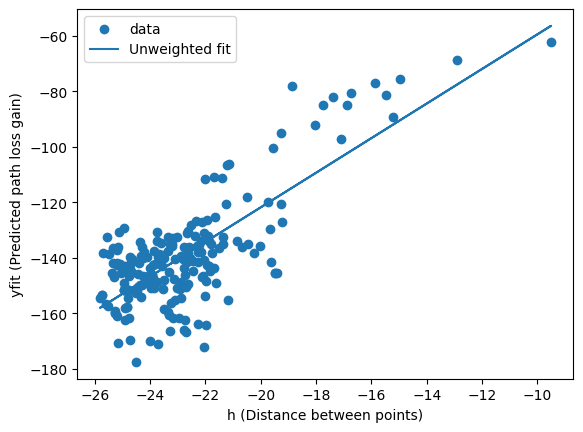

pwr_difference_matrix.shape (207, 1, 207)
pwr_difference_matrix.shape (207, 207)


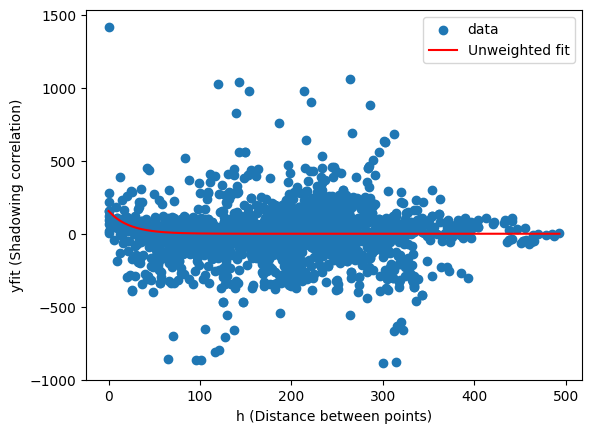

K, eta 2.870318390703487 6.231968015107056
(400, 3) (400,)
*** KeyboardInterrupt exception caught in code being profiled.

<Figure size 640x480 with 0 Axes>

Timer unit: 0.001 s

Total time: 0.731479 s
File: /home/enesk/repos/spatial-prediction/kriging_predictor.py
Function: train_pathloss_params at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                               def train_pathloss_params(self, n_maps = 40, n_points = 400, save_params = True, load_params = False):
    18         1          0.0      0.0      0.0          if not(load_params):
    19         1          0.0      0.0      0.0              Ks = []
    20         1          0.0      0.0      0.0              etas = []
    21         1          0.0      0.0      0.0              shadowing_params_1 = []
    22         1          0.0      0.0      0.0              shadowing_params_2 = []
    23         2          0.0      0.0      0.0              for _ in range(n_maps):
    24                                                           # Sample some measurements from each map
    25         2          0.0      0.0      0.0   

In [59]:
%matplotlib inline
from semivar import semivar_fit
%lprun -u 1e-3 -f semivar_fit -f kriging_predictor.train_pathloss_params kriging_predictor.train_pathloss_params()

In [ ]:

# Initiate the exploration environment
mc_iters = 500
n_uavs = 3
movement_momentum = 0.8
planning_steps  = 200
path_lengths = [40, 80, 120, 160, 200,]
#path_lengths = [200,]
used_steps =  [40, 40, 40, 40, 40,]
ee = ExplorationEnvironment(n_uavs=n_uavs, predictor=predictor, repeat_probability=movement_momentum, 
                                dataset=ds, planning_steps=planning_steps, used_steps=used_steps[0], kriging_predictor=kriging_predictor,
                                    rl_policy_path=rl_policy_path, uav_starting_proximity=False)


2023-09-14 23:53:50.968362: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-09-14 23:53:50.968397: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-09-14 23:53:50.968593: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/enesk/repos/spatial-prediction/models/RL/2023-09-13--19:46:46
2023-09-14 23:53:50.969307: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-09-14 23:53:50.969318: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/enesk/repos/spatial-prediction/models/RL/2023-09-13--19:46:46
2023-09-14 23:53:50.971236: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-09-14 23:53:51.001624: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /home/enesk/repos/spatial-prediction/models/RL/2023-09-

Loaded RL policy from /home/enesk/repos/spatial-prediction/models/RL/2023-09-13--19:46:46


In [ ]:
# These are the policies that we will test
policies = ['greedy_n_step_divide_&_conquer', 'greedy_n_step'] + ['random' for _ in range(500)]
policies = ['greedy_n_step', 'greedy_n_step_kriging', 'random_exhaustive'] + ['random' for _ in range(1)]
policies = ['random_exhaustive', ] + ['random' for _ in range(1)]
policies = ['entropy_kriging']

policies = ['greedy_n_step', 'greedy_n_step_kriging', 'random_exhaustive'] + ['random' for _ in range(1)]
#policies = ['restored_rl',] 
policies = ['random' for _ in range(1)]
policies = ['entropy_kriging', 'greedy_n_step_kriging']
policies = ['entropy_kriging', 'greedy_n_step_kriging']
# policies = ['greedy_n_step','restored_rl', 'random']
policies = ['greedy_n_step',]
policies = ['restored_rl',]
policies = ['random',]

In [ ]:
# We store the results here
mean_errors = np.zeros((len(path_lengths), mc_iters, len(policies)))

In [ ]:
%matplotlib inline

# Rendering
render =  False

# This is used for debugging
best_random_traj = []

# This is for restarting the loop
completed_iters = np.sum(np.min(mean_errors>0, axis = (0, 2)))

for j in range(completed_iters, mc_iters):

    print("mc_iter", j)
    
    
    for l, path_length in enumerate(path_lengths):
        print("path_length", path_length)
        seed = j+4
        random.seed(seed*1020)
        np.random.seed(seed*1020)
        best_random_error = np.inf

        # Set the path length - important for certain path planning policies such as exhaustive search
        ee.max_episode_length = path_length
        ee.used_steps = used_steps[l]

        for i, policy in enumerate(policies):
            
            if i == 0:
                ss_grids, building_grid, initial_coordinates, user_locations = ee.reset()
            else:
                ss_grids, building_grid, initial_coordinates, user_locations = ee.reset(ss_grids, building_grid, user_locations, initial_coordinates)
            ee.policy = policy
            
            # Plot non-random policies
            mean_error, measured_coords, _, _, _ = ee.run(render = (render and (policy != "random")), n_steps=path_length)
            print("measured_coords", measured_coords.shape)


            
            # Store best random error
            if policy == "random" and mean_error < best_random_error:
                best_random_error = mean_error
                best_random_traj = measured_coords

            # Print error
            mean_errors[l, j, i] = mean_error
            if policy != "random":
                print('policy:', policy)
                print('mean_error:', mean_error)

        # Random exhaustive error    
        print('policy:', policy)
        print('mean_error:', best_random_error)
        print('action overrides', ee.action_overrides)

        # Plot best random trajectory
        if render:
            # Plot the best random traj
            ee.render(0, measured_coords=best_random_traj)

        plt.show()



mc_iter 0
path_length 40
measured_coords (96, 2)
policy: random
mean_error: 33.286583865663935
action overrides 0
path_length 80
measured_coords (184, 2)
policy: random
mean_error: 34.8518553168622
action overrides 0
path_length 120
measured_coords (276, 2)
policy: random
mean_error: 32.9334780244052
action overrides 0
path_length 160
measured_coords (352, 2)
policy: random
mean_error: 32.88675619309418
action overrides 0
path_length 200
measured_coords (461, 2)
policy: random
mean_error: 32.458752321800965
action overrides 0
mc_iter 1
path_length 40
measured_coords (92, 2)
policy: random
mean_error: 10.010145969165738
action overrides 0
path_length 80
measured_coords (167, 2)
policy: random
mean_error: 9.847405596859394
action overrides 0
path_length 120
measured_coords (238, 2)
policy: random
mean_error: 10.09503229463235
action overrides 0
path_length 160
measured_coords (305, 2)
policy: random
mean_error: 9.775603144502497
action overrides 0
path_length 200
measured_coords (380, 2)

In [ ]:
input("Press Enter to save results to file.")

mean_errors
store_path = 'pickles/%s+%s+%d' % (output_name, dataset_dir, n_uavs)
isExist = os.path.exists(store_path)
if not isExist:
    os.makedirs(store_path)


for pol_idx, pol in enumerate(policies):
    np.save('%s/%s' % (store_path, pol), mean_errors[:, :, pol_idx])
        


In [63]:
# Reload the data
store_path = 'pickles/%s+%s+%d' % (output_name, dataset_dir, n_uavs)

results_per_policy = {}
for subdir, dirs, files in os.walk(store_path):
    for file in files:
        data = np.load(os.path.join(subdir, file))
        policy_name = file.replace(".npy", "")
        results_per_policy[policy_name] = data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


168
[19.74797376 17.69374349 16.39971301 14.86648942 13.83266297]
500
[19.63110992 17.8046668  16.81209943 15.69275558 14.55813648]
500
[16.39081912 14.8179244  13.98862271 13.42124205 13.02558295]
500
[16.71887379 15.37877443 14.66682895 14.20309458 13.73810618]
500
[15.78855083 14.08086781 13.18878069 12.65519895 12.24712866]
500
[21.15767214 20.47118819 19.95312253 19.50526866 19.14252192]


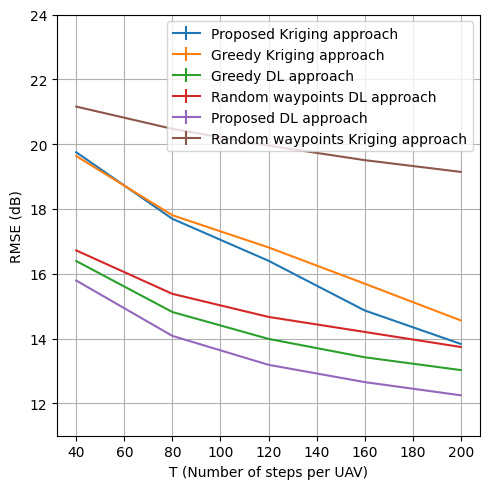

In [70]:
fig, ax = plt.subplots(figsize = (5,5))
approaches = {'GPR with maximum entropy path planning' : 0,   'Deep learning with greedy path planning' : 1, 'GPR with greedy path planning' : 2, 'Deep learning with oracle path planning' : 3}

pretty_names = {}
pretty_names['entropy_kriging'] = "Proposed Kriging approach"
pretty_names['random'] = "Random waypoints DL approach"
pretty_names['greedy_n_step_kriging'] = "Greedy Kriging approach"
pretty_names['greedy_n_step'] = "Greedy DL approach"
pretty_names['restored_rl'] = "Proposed DL approach"
pretty_names['random_kriging'] = "Random waypoints Kriging approach"
for pol, mean_errs in results_per_policy.items():
    if not("exhaustive" in pol):
        completed_iters = np.sum(np.min(mean_errs>0, axis = (0,)))
        print(completed_iters)

        errors = np.mean(mean_errs[:, 0:completed_iters], axis = 1)
        stds = np.std(mean_errs[:, 0:completed_iters], axis = 1)*0
        print(errors)


        ax.errorbar(path_lengths, errors, yerr = stds, label = pretty_names[pol])

ax.legend()
ax.set_xlabel("T (Number of steps per UAV)")
ax.set_ylabel("RMSE (dB)")
ax.grid()
ax.set_ylim([11, 24])
fig.tight_layout()
fig.savefig("figures/3_uav_sep.eps", pad_inches=0.0)


In [65]:
fig.savefig('figures/foo.png')